In [134]:
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [135]:
df = pd.read_csv('OnlineRetail.csv') 

In [136]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,快乐美丽WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [137]:
# df['CustomerID'] = df['CustomerID'].astype('str')

In [138]:
df.shape

(541909, 8)

In [139]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4224,WHITE HANGING HEART T-LIGHT HOLDER,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,31-10-2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [141]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [142]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [143]:
df[df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom


In [144]:
df[df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom


In [145]:
df = df.dropna()
df.shape

(406829, 8)

In [146]:
df['CustomerID'] = df['CustomerID'].astype('str')

In [147]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,快乐美丽WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


* R : Recency
* F : Frequency
* M : Monetary

In [148]:
df['Amount'] = df['UnitPrice'] * df['Quantity']
df_m = df.groupby(['CustomerID'])['Amount'].sum()
df_m = df_m.reset_index()
df_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [149]:
df_f = df.groupby(['CustomerID'])['InvoiceNo'].count()
df_f = df_f.reset_index()
df_f.columns = ['CustomerID', 'Frequency']
df_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [150]:
df_mf = pd.merge(df_m, df_f, how='inner', on='CustomerID')
df_mf.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [151]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [152]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [153]:
df['Diff'] = max_date - df['InvoiceDate']
df_r = df.groupby('CustomerID')['Diff'].min()
df_r = df_r.reset_index()
df_r.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [154]:
df_r['Diff'] =  df_r['Diff'].dt.days

In [155]:
df_r.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [156]:
df_rfm = pd.merge(df_mf,df_r, how='inner', on='CustomerID')
df_rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


[]

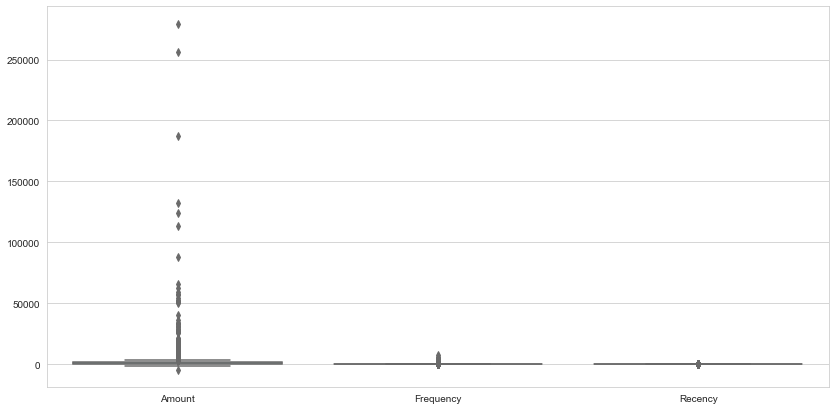

In [157]:
plt.figure(figsize=(14,7))
attrs = [ 'Amount', 'Frequency', 'Recency']
sns.boxplot(data = df_rfm[attrs])
plt.plot()

In [158]:
df_rfm.shape

(4372, 4)

In [159]:
Q1 = df_rfm.Amount.quantile(0.05)
Q3 = df_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1 
df_rfm = df_rfm[(df_rfm.Amount >= Q1 - 1.5 * IQR) & (df_rfm.Amount <= Q3 + 1.5 * IQR)]

Q1 = df_rfm.Frequency.quantile(0.05)
Q3 = df_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1 
df_rfm = df_rfm[(df_rfm.Frequency >= Q1 - 1.5 * IQR) & (df_rfm.Frequency <= Q3 + 1.5 * IQR)]

Q1 = df_rfm.Recency.quantile(0.05)
Q3 = df_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1 
df_rfm = df_rfm[(df_rfm.Recency >= Q1 - 1.5 * IQR) & (df_rfm.Recency <= Q3 + 1.5 * IQR)]


[]

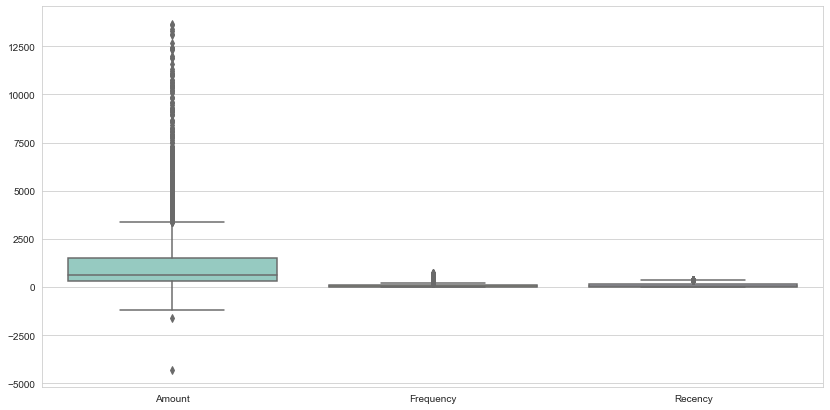

In [160]:
plt.figure(figsize=(14,7))
attrs = [ 'Amount', 'Frequency', 'Recency']
sns.boxplot(data = df_rfm[attrs])
plt.plot()

In [161]:
df_rfm.shape

(4293, 4)

In [162]:
df_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm[['Amount', 'Recency', 'Frequency']])
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Amount', 'Recency', 'Frequency']
df_rfm_scaled.head()

,Amount,Recency,Frequency
0,-0.723738,2.301611,-0.752888
1,1.731617,-0.906466,1.042467
2,0.300128,-0.183658,-0.463636
3,0.277517,-0.738141,-0.044720
4,-0.533235,2.143188,-0.603275


In [164]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=4)
km.fit(df_rfm_scaled)

KMeans(n_clusters=4)

In [165]:
km.labels_

array([3, 1, 0, ..., 3, 0, 0], dtype=int32)

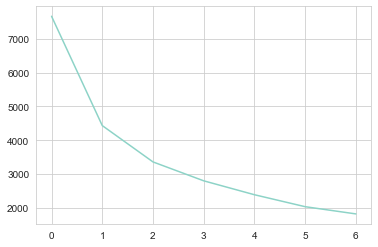

In [166]:
sse = []
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(df_rfm_scaled)
    sse.append(km.inertia_)

plt.plot(sse)

In [167]:
km = KMeans(n_clusters=4)
km.fit(df_rfm_scaled)
df_rfm['Cluster_ID'] =  km.labels_

<AxesSubplot:xlabel='Cluster_ID', ylabel='Amount'>

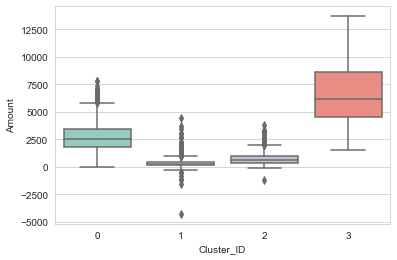

In [168]:
sns.boxplot(x='Cluster_ID', y='Amount', data = df_rfm)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Recency'>

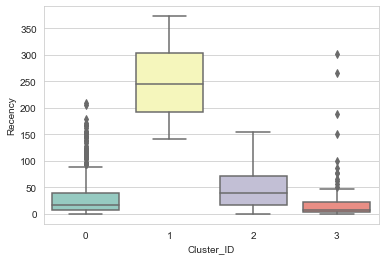

In [169]:
sns.boxplot(x='Cluster_ID', y='Recency', data = df_rfm)

<AxesSubplot:xlabel='Cluster_ID', ylabel='Frequency'>

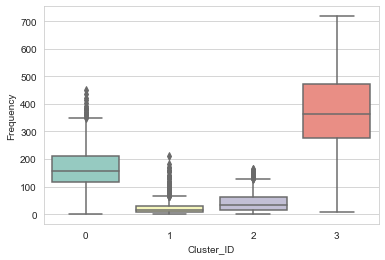

In [170]:
sns.boxplot(x='Cluster_ID', y='Frequency', data = df_rfm)